# This sample code is used to test the clustering effect of STAIG on slice #151673 under the gene similarity.

### Step 0：Since Jupyter Notebook does not automatically release GPU memory after running, please run this code to clear all processes occupying GPU memory before the FIRST time starting execution.

In [1]:
!fuser -v /dev/nvidia* |awk '{for(i=1;i<=NF;i++)print "kill -9 " $i;}' | sh

Cannot stat file /proc/1064085/fd/0: Permission denied
Cannot stat file /proc/1064085/fd/1: Permission denied
Cannot stat file /proc/1064085/fd/2: Permission denied
Cannot stat file /proc/1064085/fd/3: Permission denied
Cannot stat file /proc/1064085/fd/4: Permission denied
Cannot stat file /proc/1064085/fd/5: Permission denied
Cannot stat file /proc/1064085/fd/8: Permission denied
Cannot stat file /proc/1064091/fd/0: Permission denied
Cannot stat file /proc/1064091/fd/1: Permission denied
Cannot stat file /proc/1064091/fd/2: Permission denied
Cannot stat file /proc/1064091/fd/3: Permission denied
Cannot stat file /proc/1064091/fd/4: Permission denied
Cannot stat file /proc/1064091/fd/5: Permission denied
Cannot stat file /proc/1064091/fd/8: Permission denied
                     USER        PID ACCESS COMMAND
/dev/nvidia-uvm:     root      mount /dev/nvidia-uvm
                     root      F...m python
/dev/nvidia-uvm-tools:
                     root      mount /dev/nvidia-uvm-tools

### Step 1: Load packages

In [2]:
import argparse
import os
os.chdir('/remote-home/13186919777/home/STAIG-test')
import warnings
warnings.filterwarnings('ignore')
import random
import yaml
from yaml import SafeLoader
import torch
from staig.adata_processing import LoadSingle10xAdata,LoadBatch10xAdata
import numpy as np
from staig.staig import STAIG
import pandas as pd
import scanpy as sc

### Step 2: Load data and train

In [3]:
file_fold = './Dataset'


args = argparse.Namespace(
    dataset='DLPFC',
    slide='151673',
    config='train_no_img_config.yaml',
    label=True,
)

config = yaml.load(open(args.config), Loader=SafeLoader)[int(args.slide)]


slide_path = os.path.join(file_fold, args.dataset, args.slide)

torch.manual_seed(config['seed'])
np.random.seed(config['seed'])
if torch.cuda.is_available():
    torch.cuda.manual_seed(config['seed'])
    torch.cuda.manual_seed_all(config['seed'])
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
random.seed(12345)

data = LoadSingle10xAdata(path=slide_path,n_neighbors=config['num_neigh'],n_top_genes=config['num_gene'],image_emb=False, label = args.label).run()
staig = STAIG(args=args,config=config,single=True)    
staig.adata = data
staig.train()
staig.eva()


adata load done
=== prepare for training ===
=== train ===


100%|██████████| [00:06<00:00, 53.99it/s]


=== load ===
embedding generated, go clustering


### Step 3: Show results

fitting ...
  |======================================================================| 100%
calculate metric ARI
ARI: 0.6521028719030502
NMI: 0.7289477142020983


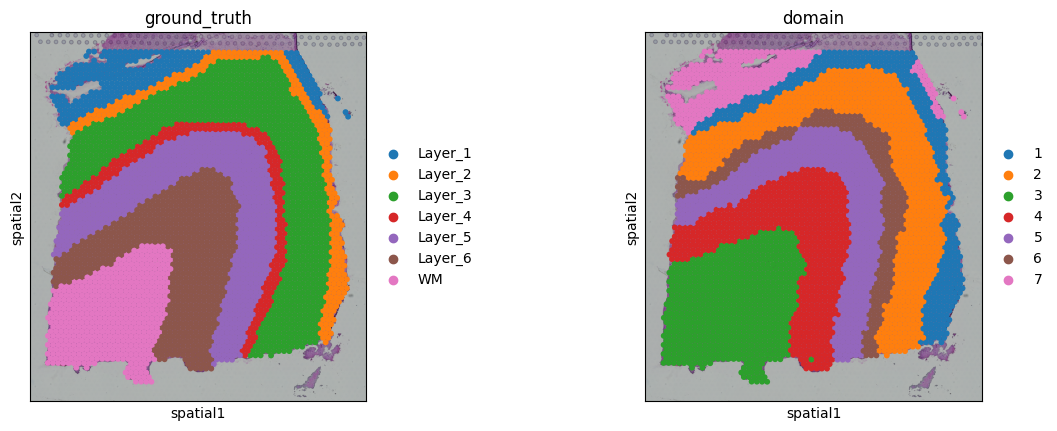

In [4]:
staig.cluster(args.label)
staig.draw_spatial()